# Exp 2: Image Intensity Transformations and Spatial Filtering #
## 1.	Aims ##

#### 1. Learn the method of contrast adjustment and histogram equalization.

#### 2. Learn how to display histograms of images.
    
#### 3. Learn how to perform spatial filtering.

## 2.	Steps and Requirements

### (1) Perform Contrast Adjustment.	
(a) Load the image 'beans.png'. 

(b) Stretch its graysacle to the range of [0,1]. (Tips: ``skimage.exposure.rescale_intensity``) 

(c) Shrink its grayscale to the range of [0.2,0.8]. (Tips: ``skimage.exposure.rescale_intensity``) 

(d) Obtain the negative image. (Tips: ``skimage.exposure.rescale_intensity``) 

(e) Perform log transformation. (Tips: ``skimage.exposure.adjust_log``)  

(f) Perform Gamma transformation with $\gamma=0.5$ and $\gamma=1.5$, respectively. (Tips: ``skimage.exposure.adjust_gamma``) 

Display the images with suitable titles. 

C:\Users\12737\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


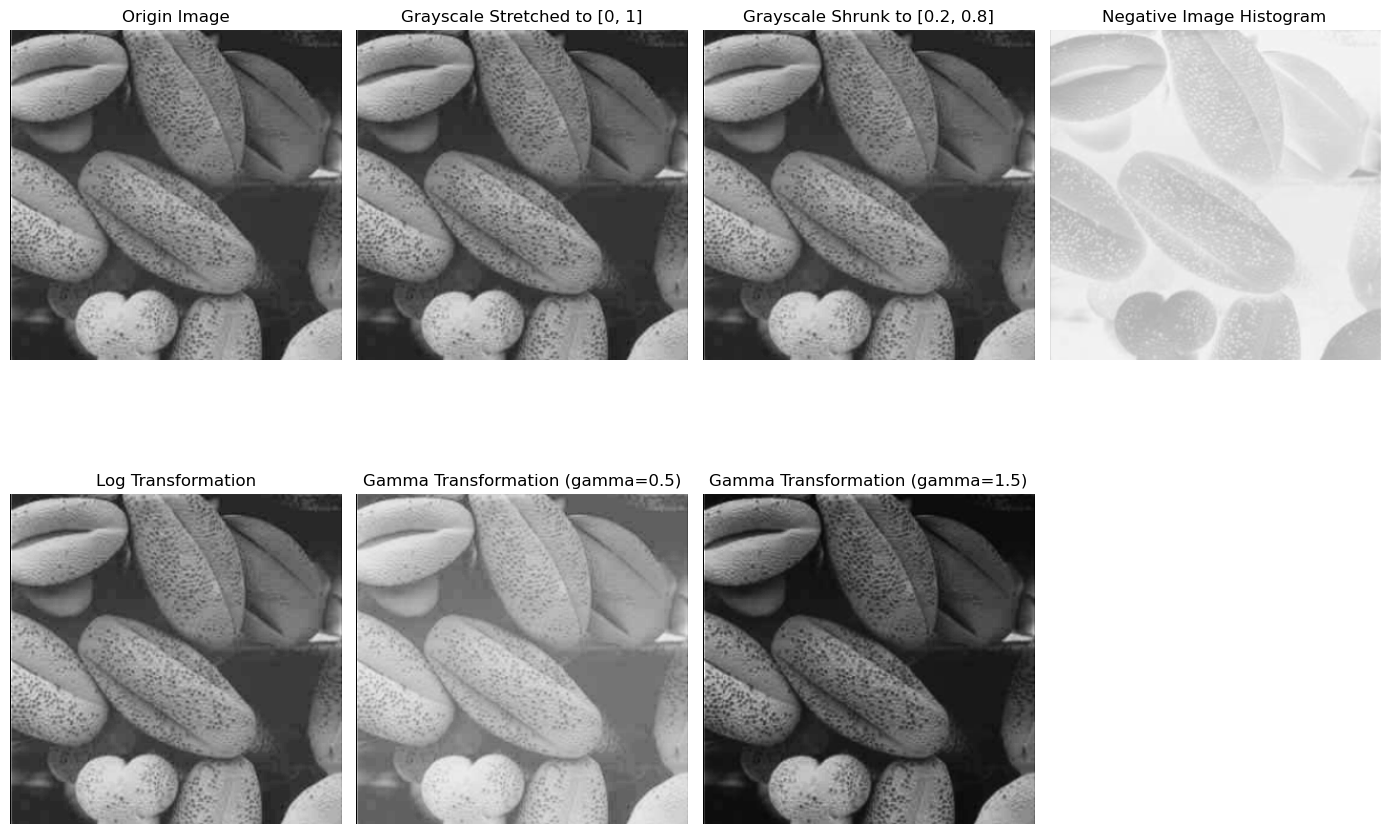

In [1]:
import matplotlib.pyplot as plt
from skimage import io, exposure


# (a) Load the image
img1 = io.imread('images/beans.png', as_gray=True)  
# (b) Stretch grayscale to [0, 1]
stretched_img = exposure.rescale_intensity(img1, in_range='image', out_range=(0, 1))
# (c) Shrink its grayscale to the range of [0.2,0.8].
shrunk_img = exposure.rescale_intensity(img1, in_range='image', out_range=(0.2, 0.8))
# (d) Obtain the negative image
negative_img = 1 - img1
# (e) Perform log transformation.
log_img = exposure.adjust_log(img1)
# (f) Perform Gamma transformation with  𝛾=0.5 and  𝛾=1.5, respectively
gamma05_img = exposure.adjust_gamma(img1,gamma=0.5)
gamma15_img = exposure.adjust_gamma(img1,gamma=1.5)

# Display all the images
plt.figure(figsize=(14, 10))

plt.subplot(2,4,1)
plt.imshow(img1, cmap='gray')
plt.title('Origin Image')
plt.axis('off')

plt.subplot(2,4,2)
plt.imshow(stretched_img, cmap='gray', vmin=0, vmax=1)
plt.title('Grayscale Stretched to [0, 1]')
plt.axis('off')

plt.subplot(2,4,3)
plt.imshow(shrunk_img, cmap='gray', vmin=0.2, vmax=0.8)
plt.title('Grayscale Shrunk to [0.2, 0.8]')
plt.axis('off')

plt.subplot(2,4,4)
plt.imshow(negative_img, cmap='gray', vmin=0, vmax=1)  
plt.title('Negative Image Histogram')
plt.axis('off')

plt.subplot(2,4,5)
plt.imshow(log_img, cmap='gray', vmin=log_img.min(), vmax=log_img.max())  # Dynamic vmin/vmax
plt.title('Log Transformation')
plt.axis('off')

plt.subplot(2,4,6)
plt.imshow(gamma05_img, cmap='gray', vmin=gamma05_img.min(), vmax=gamma05_img.max())
plt.title('Gamma Transformation (gamma=0.5)')
plt.axis('off')

plt.subplot(2,4,7)
plt.imshow(gamma15_img, cmap='gray', vmin=gamma15_img.min(), vmax=gamma15_img.max())
plt.title('Gamma Transformation (gamma=1.5)')
plt.axis('off')

plt.tight_layout()
plt.show()

### (2) Compute and Display Image Histogram.	
(a) Compute the histogram of the original image and the histograms of the adjusted images above.
(<font style="color:red;"> Tips:``Matplotlib.pyplot.hist``or ``skimage.exposure.histogram(image, nbins=256)``</font>) 

(b) Display the histogram of the original image and the histograms of the adjusted images above. Use a suitlabe title for each figure.


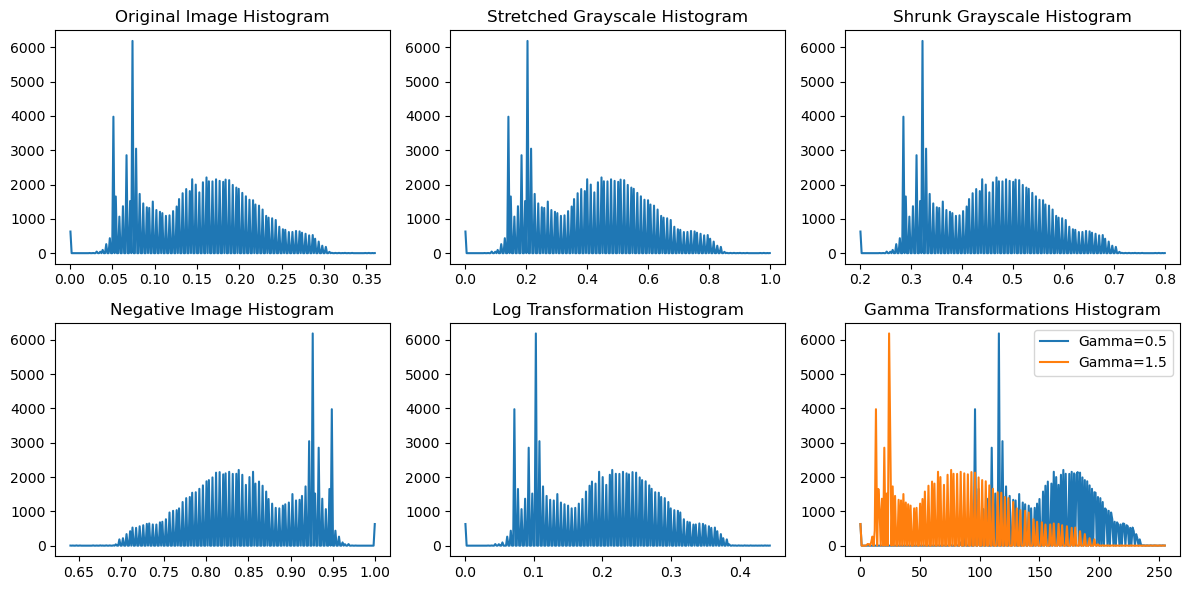

In [2]:
import skimage
import matplotlib.pyplot as plt
from skimage import io, exposure

img1 = io.imread('images/beans.png')
img1 = skimage.color.rgb2gray(img1)
# (a) Compute the histogram of the original image and the histograms of the adjusted images above.
original_hist, bins_origin = exposure.histogram(img1, nbins=256)
stretched_hist, bins_stretched = exposure.histogram(stretched_img, nbins=256)
shrunk_hist, bins_shrunk = exposure.histogram(shrunk_img, nbins=256)
negative_hist, bins_negative = exposure.histogram(negative_img, nbins=256)  
log_hist, bins_log = exposure.histogram(log_img, nbins=256)
gamma_05_hist, _ = exposure.histogram(gamma05_img, nbins=256)
gamma_15_hist, _ = exposure.histogram(gamma15_img, nbins=256)
# (b) Display histograms
plt.figure(figsize=(12, 6))  # Adjust figure size for better clarity

# Original image
plt.subplot(2,3,1)
plt.plot(bins_origin, original_hist)  
plt.title('Original Image Histogram')
  

# Stretched image
plt.subplot(2,3,2)
plt.plot(bins_stretched,stretched_hist)
plt.title('Stretched Grayscale Histogram')

# Shrunk image
plt.subplot(2,3,3)
plt.plot(bins_shrunk,shrunk_hist)
plt.title('Shrunk Grayscale Histogram')

# Negative image
plt.subplot(2,3,4)
plt.plot(bins_negative ,negative_hist)  # Adjust range for inverted image
plt.title('Negative Image Histogram')

# Log transformation
plt.subplot(2,3,5)
plt.plot(bins_log,log_hist)
plt.title('Log Transformation Histogram')

# Gamma transformations
plt.subplot(2,3,6)
plt.plot(gamma_05_hist, label='Gamma=0.5')
plt.plot(gamma_15_hist, label='Gamma=1.5')
plt.title('Gamma Transformations Histogram')
plt.legend()

plt.tight_layout()
plt.show()

### (3) Image Histogram Equalization 	
(a) Load the image 'beans.png'.  

(b) Perform histogram equalization of the image. (Tips: ``skimage.exposure.equalize_hist``) 

(c) Display the original image, the equalized image, the histogram of the original image, and the equalized image.  

(d) Answer the question: What are their differences?


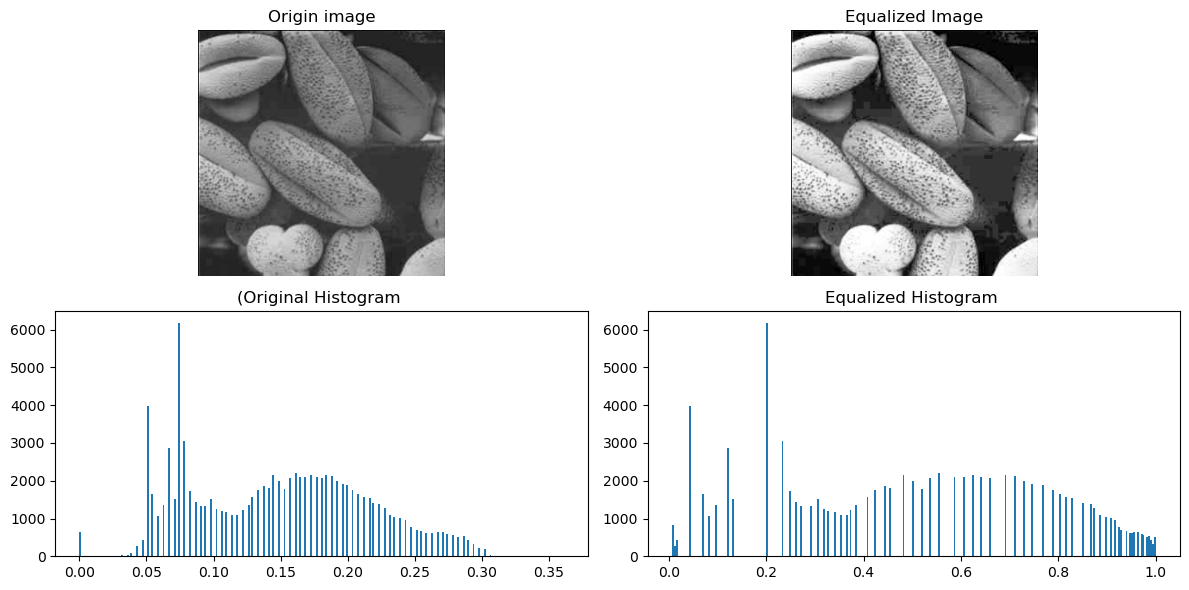

Visual: The equalized image might appear brighter or have more contrast compared to the original image. 
This is because histogram equalization aims to spread out the pixel intensities, making details in areas with low or high intensity more visible.
Histogram: The original image's histogram might be skewed towards a specific intensity range.
The equalized image's histogram should be more evenly distributed across the intensity range (0-255) for grayscale image
This even distribution indicates pixels are spread more uniformly across all intensity levels.


In [3]:
from skimage import io, exposure
import matplotlib.pyplot as plt

# (a) Load the image 'beans.png'.
img2 = io.imread('images/beans.png', as_gray=True)
# (b) Perform histogram equalization of the image
equalized_img = exposure.equalize_hist(img2)
# (c) Display the original image, the equalized image, the histogram of the original image, and the equalized image.
plt.figure(figsize=(12, 6))

plt.subplot(2,2,1)
plt.imshow(img2,cmap='gray')
plt.title('Origin image')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(2,2,3)
plt.hist(img2.ravel(),bins=256)
plt.title('(Original Histogram ')

plt.subplot(2,2,4)
plt.hist(equalized_img.ravel(),bins=256)
plt.title('Equalized Histogram ')

plt.tight_layout()
plt.show()

# (d) Answer the question: What are their differences?
print('Visual: The equalized image might appear brighter or have more contrast compared to the original image. ')
print('This is because histogram equalization aims to spread out the pixel intensities, making details in areas with low or high intensity more visible.')
print("Histogram: The original image's histogram might be skewed towards a specific intensity range.")
print("The equalized image's histogram should be more evenly distributed across the intensity range (0-255) for grayscale image")
print("This even distribution indicates pixels are spread more uniformly across all intensity levels.")

### (4) Smoothing Linear Filtering.	
(a) Load the image 'mandrill.jpg'. 

(b) Add salt&Pepper noise with different intensities (at least 3 kinds). (Tips: ``skimage.util.random_noise``) 

(c) Perform smoothing linear filtering to smooth these noised images respectively. (Tips: ``ImageFilter.BLUR``) 

(d) Display the images in the same figure with sub-figures. Add the corresponding title to each sub-figure.

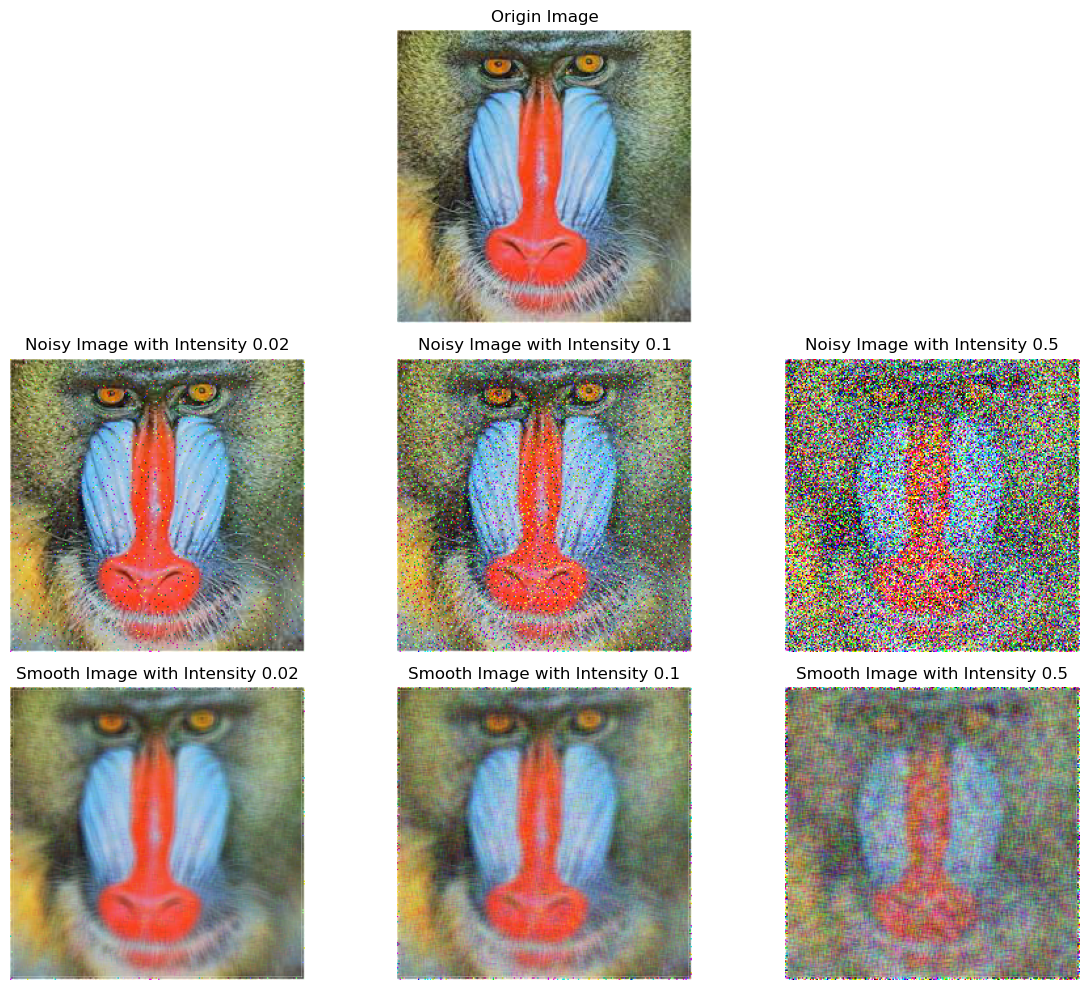

In [8]:
from skimage import io, util, filters
import matplotlib.pyplot as plt
from PIL import ImageFilter,Image
import numpy as np


# (a) Load the image 'mandrill.jpg'.
img3 = io.imread('images/mandrill.jpg') 

# (b) Add salt&Pepper noise with different intensities
noise_intensities = [0.02 ,0.1, 0.5]
noisy_images = []

for intensity in noise_intensities:
    noisy_img = util.random_noise(img3, mode='s&p', amount=intensity)
    noisy_img = Image.fromarray((noisy_img * 255).astype(np.uint8))
    noisy_images.append(noisy_img)
    
# (c) Perform smoothing linear filtering to smooth these noised images respectively
smoothed_images = [noisy_img.filter(ImageFilter.BLUR) for noisy_img in noisy_images ]

# (d) Display the images in the same figure with sub-figures. Add the corresponding title to each sub-figure.
plt.figure(figsize=(12,10))

plt.subplot(3,3,2)
plt.imshow(img3,cmap='gray')
plt.title('Origin Image')
plt.axis('off')

for i,(noisy_img, smoothed_img, intensity) in enumerate(zip(noisy_images,smoothed_images,noise_intensities)):
    plt.subplot(3, 3 ,i+4)
    plt.imshow(noisy_img,cmap='gray')
    plt.title(f'Noisy Image with Intensity {intensity}')
    plt.axis('off')
    
    plt.subplot(3, 3, i+7)
    plt.imshow(smoothed_img,cmap='gray')
    plt.title(f'Smooth Image with Intensity {intensity}')
    plt.axis('off')
    

plt.tight_layout()
plt.show()

### (5) Gaussian Smoothing Filtering.	
(a) Load the image 'mandrill.jpg'. 

(b) Add Gaussian noise to image. (Tips: ``skimage.util.random_noise``) 

(c) Perform Gaussian Smoothing Filtering to smooth the noised image. Select kernels with different radius values (at least 3 kinds). (Tips: ``ImageFilter. GaussianBlur``) 

(d) Display the images in the same figure with sub-figures. Add the corresponding title to each sub-figure.

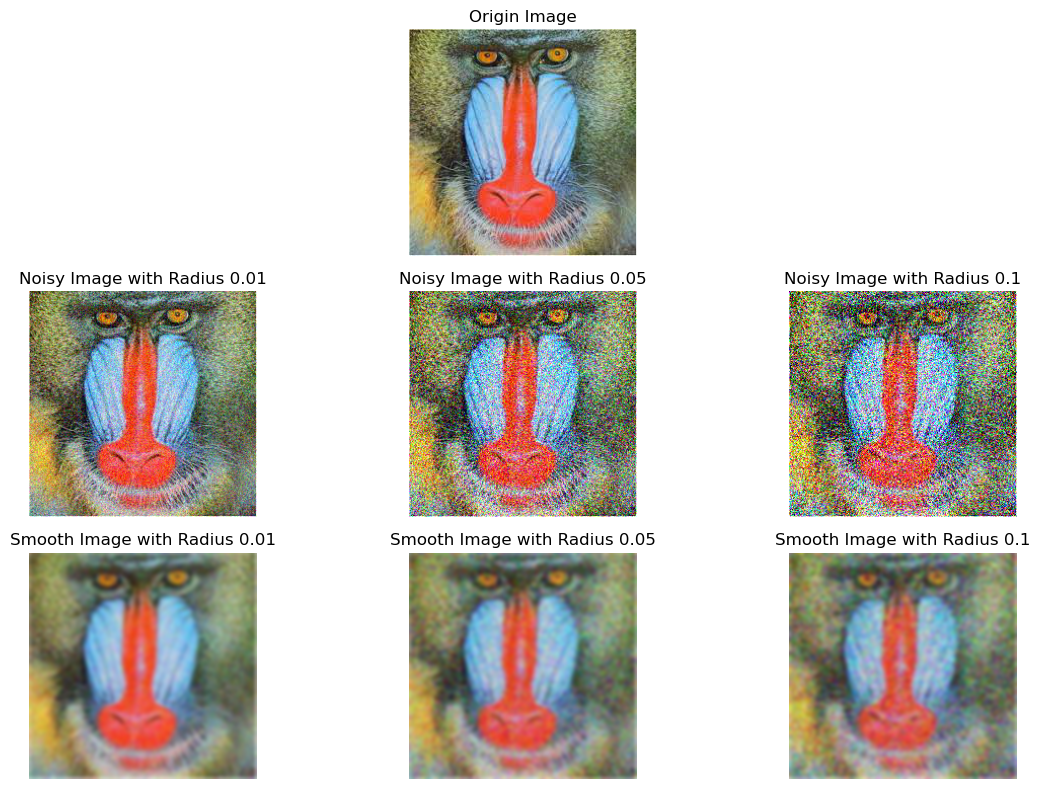

In [8]:
from skimage import io, util, filters
import matplotlib.pyplot as plt
from PIL import ImageFilter,Image
import numpy as np

# (a) Load the image 'mandrill.jpg'.
img4 = io.imread('images/mandrill.jpg')

# (b) Add Gaussian noise to image.
kernel = [0.01, 0.05 ,0.1] 
noisy_images = []

for radius in kernel:
    noisy_img = util.random_noise(img4, mode='gaussian', mean=0, var=radius)
    noisy_img = Image.fromarray((noisy_img * 255).astype(np.uint8))
    noisy_images.append(noisy_img)


# (c) Perform Gaussian Smoothing Filtering to smooth the noised image. Select kernels with different radius values (at least 3 kinds)
smoothed_images = [noisy_img.filter(ImageFilter.GaussianBlur) for noisy_img in noisy_images ]

# (d) Display the images in the same figure with sub-figures. Add the corresponding title to each sub-figure.
plt.figure(figsize=(12,8))

plt.subplot(3,3,2)
plt.imshow(img4,cmap='gray')
plt.title('Origin Image')
plt.axis('off')

for i, (noisy_img,smoothed_img,radius) in enumerate(zip(noisy_images,smoothed_images,kernel)):
    plt.subplot(3,3,i+4)
    plt.imshow(noisy_img,cmap='gray')
    plt.title(f'Noisy Image with Radius {radius}')
    plt.axis('off')
    
    plt.subplot(3,3,i+7)
    plt.imshow(smoothed_img, cmap='gray')
    plt.title(f'Smooth Image with Radius {radius}')
    plt.axis('off')

plt.tight_layout()
plt.show()


### (6) Median Filtering.	
(a) Load the image 'mandrill.jpg'. 

(b) Add salt&Pepper noise with different intensities (at least 3 kinds). (Tips: ``skimage.util.random_noise``) 

(c) Perform median filtering to smooth these noised images respectively. Select kernels with different radius parameter values (at least 3 kinds). (Tips: ``ImageFilter.MedianFilter``) 

(d) Display the images in the same figure with sub-figures. Add the corresponding title to the sub-figure.

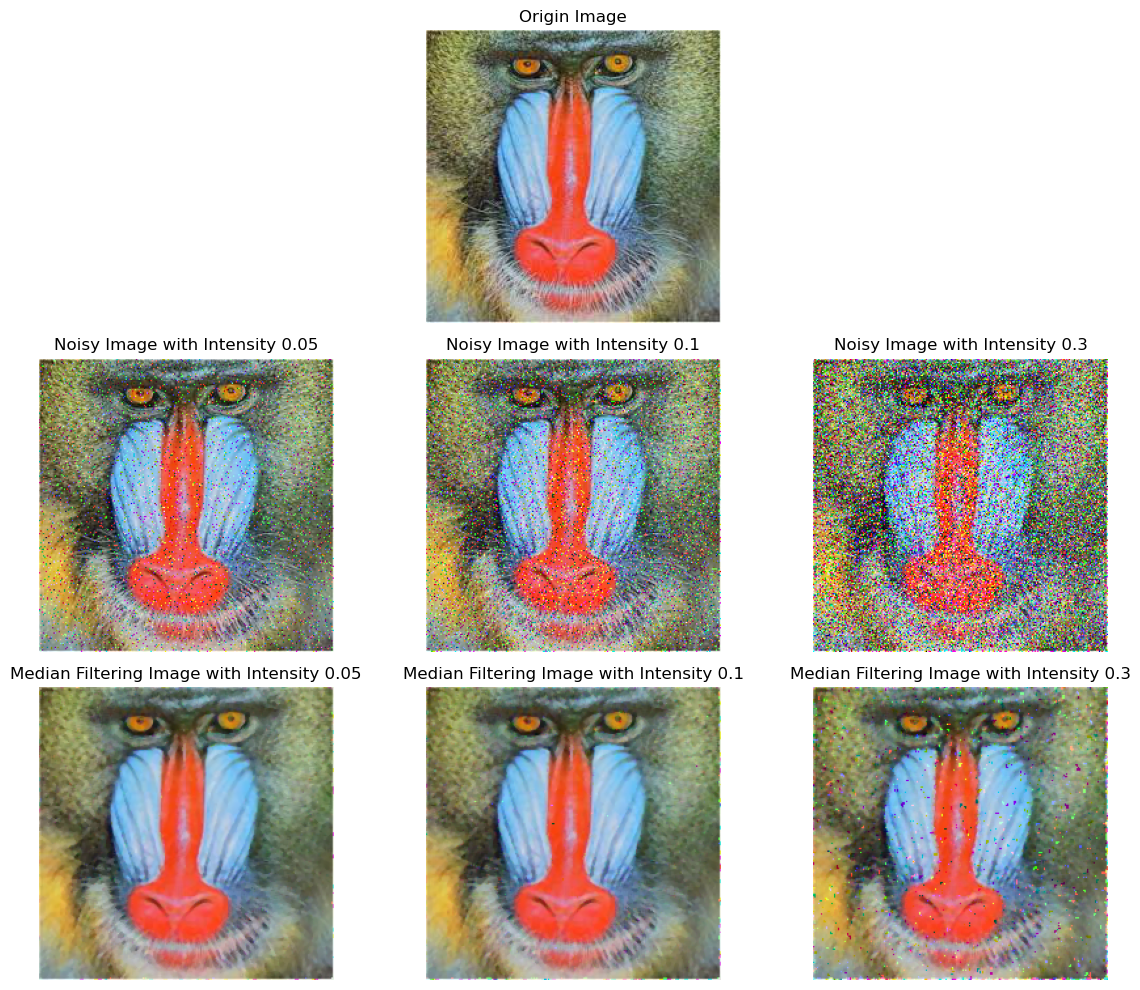

In [10]:
from skimage import io, util, filters
import matplotlib.pyplot as plt
from PIL import ImageFilter,Image
import numpy as np

# (a) Load the image 'mandrill.jpg'.
img5 = io.imread('images/mandrill.jpg')

# (b) Add salt&Pepper noise with different intensities
noise_intensities = [0.05 ,0.1, 0.3]
noisy_images = []
for intensity in noise_intensities:
    noisy_img = util.random_noise(img5, mode='s&p', amount=intensity)
    noisy_img = Image.fromarray((noisy_img * 255).astype(np.uint8))
    noisy_images.append(noisy_img)
    
# (c) Perform smoothing linear filtering to smooth these noised images respectively
smoothed_images = [noisy_img.filter(ImageFilter.MedianFilter) for noisy_img in noisy_images ]

# (d) Display the images in the same figure with sub-figures. Add the corresponding title to each sub-figure.
plt.figure(figsize=(12,10))

plt.subplot(3,3,2)
plt.imshow(img5,cmap='gray')
plt.title('Origin Image')
plt.axis('off')

for i,(noisy_img, smoothed_img, intensity) in enumerate(zip(noisy_images,smoothed_images,noise_intensities)):
    plt.subplot(3, 3 ,i+4)
    plt.imshow(noisy_img,cmap='gray')
    plt.title(f'Noisy Image with Intensity {intensity}')
    plt.axis('off')
    
    plt.subplot(3, 3, i+7)
    plt.imshow(smoothed_img,cmap='gray')
    plt.title(f'Median Filtering Image with Intensity {intensity}')
    plt.axis('off')
    

plt.tight_layout()
plt.show()                 

### (7)	 Sharpening Filtering.	 
(a) Load the image 'lena.jpg', convert it to grayscale. 

(b) Perform sharpening spatial filtering to enhance the image with different parameters (at least 3 kinds). (Tips: ``skimage.filters.laplace``)

(c) Display the images in the same figure with sub-figures. Add the corresponding title to the sub-figure.

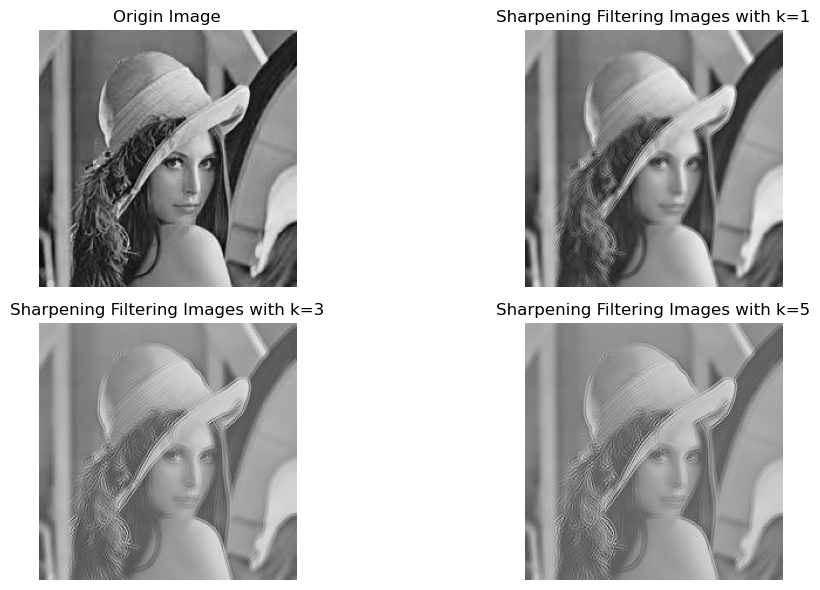

In [12]:
from skimage import io, color, filters
import matplotlib.pyplot as plt
# (a) Load the image 'lena.jpg', convert it to grayscale.
img6 = io.imread('images/lena.jpg',as_gray=True)

# (b) Perform sharpening spatial filtering to enhance the image with different parameters
parameters = [1, 3, 5]
sharpen_images = [img6 + param *(img6 - filters.laplace(img6)) for param in parameters]

# (c) Display the images in the same figure with sub-figures. Add the corresponding title to the sub-figure.
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.imshow(img6, cmap='gray')
plt.title('Origin Image')
plt.axis('off')

for i,(param,sharpen_img) in enumerate(zip(parameters,sharpen_images)):
    plt.subplot(2,2,i+2)
    plt.imshow(sharpen_img,cmap='gray')
    plt.title(f'Sharpening Filtering Images with k={param}')
    plt.axis('off')

plt.tight_layout()
plt.show()    


### (8)	Face Detection and Processing with OpenCV. (``Bonus Practice``)
Load the image 'exp2_7.jpg'. 

(a) The face region is detected and marked with a <font style="color:green;">green</font></center> rectangle.(Tips: You may use``cv2.CascadeClassifier``, or ``cv2.dnn.readNetFromCaffe``, or [``MTCNN``](https://github.com/timesler/facenet-pytorch))

(b) Perform Gaussian smoothing filtering for the background region. Some examples of the generated results are shown in the figure below.
 
![result1](./images/exp2_7_1.png) 
<center><font style="color:red;">** Figure 1. The result of cv2.CascadeClassifier ** </font></center>

![result2](./images/exp2_7_2.png) 
<center><font style="color:red;">** Figure 2. The result of cv2.dnn.readNetFromCaffe ** </font></center>

![result3](./images/exp2_7_3.png) 
<center><font style="color:red;">** Figure 3. The result of MTCNN ** </font></center>

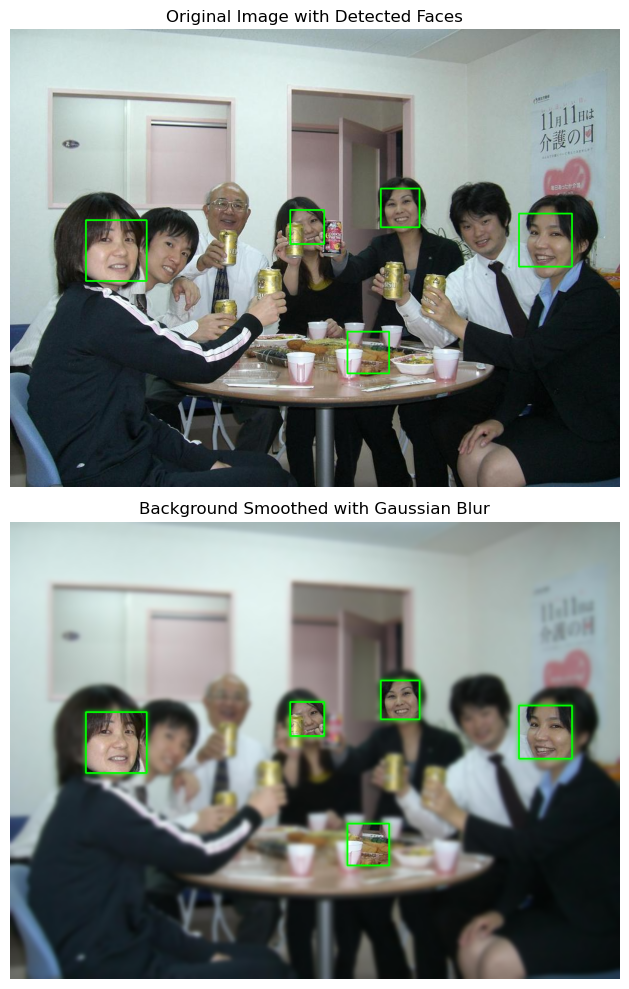

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# (a) The face region is detected and marked with a green rectangle
img7 = cv2.imread('images/exp2_7.jpg')
gray_image = cv2.cvtColor(img7, cv2.COLOR_BGR2GRAY)

# Load the pre-trained classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=4, minSize=(30, 30))

# Mark the face regions on the original image
for (x, y, w, h) in faces:
    # Draw a green rectangle around the face
    cv2.rectangle(img7, (x, y), (x+w, y+h), (0, 255, 0), 2)

# (b) Perform Gaussian smoothing filtering for the background region
# Apply Gaussian blur to the background region
blurred_img = cv2.GaussianBlur(img7, (21, 21), 0)

# Mark the face regions on the blurred image and preserve their clarity
for (x, y, w, h) in faces:
    # Draw a green rectangle on the blurred image for reference
    cv2.rectangle(blurred_img, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Create a mask to isolate the face region
    mask = np.zeros((img7.shape[0], img7.shape[1]), dtype=np.float32)
    cv2.rectangle(mask, (x, y), (x+w, y+h), 1.0, -1)

    # Apply the mask to keep the face region sharp while the background remains blurred
    alpha = 1.0  # Weight for the face region (sharp)
    beta = 0.0   # Weight for the background region (blurred)
    blurred_img[y:y+h, x:x+w] = alpha * img7[y:y+h, x:x+w] + beta * (blurred_img[y:y+h, x:x+w] - img7[y:y+h, x:x+w])

# Display the original image and the processed image using matplotlib.pyplot
plt.figure(figsize=(12,10))
plt.subplot(2, 1, 1)
plt.imshow(cv2.cvtColor(img7, cv2.COLOR_BGR2RGB))
plt.title('Original Image with Detected Faces')
plt.axis('off') 

plt.subplot(2, 1, 2)
plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
plt.title('Background Smoothed with Gaussian Blur')
plt.axis('off') 

plt.tight_layout() 
plt.show()

### (9)	Face Detection with Laptop Camera. (``Bonus Practice``)
(a) Load video stream from the laptop camera.

(b) Use a face detection model to detect images captured by the camera.

(c) Mark the face region with a <font style="color:green;">green</font></center> rectangle to achieve real-time detection as good as possible.

(d) Perform Gaussian smoothing filtering for the background region.

In [ ]:
import cv2
import numpy as np

# (a) Load video stream from the laptop camera.
cap = cv2.VideoCapture(0)

# Define the video codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('task9.avi', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))
# Load the pre-trained classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
    # (b) Use a face detection model to detect images captured by the camera.
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the captured image to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # (d) Perform Gaussian smoothing filtering for the background region
    blurred = cv2.GaussianBlur(frame, (21, 21), 0)

    # Create a mask where the background area is set to 0 and the face area is set to 1
    mask = np.zeros_like(blurred)
    for (x, y, w, h) in faces:
        # Set the face area to 1 in the mask
        mask[y:y+h, x:x+w] = 1

    # Apply the mask to keep the face area sharp while blurring the background
    result = (1 - mask) * blurred + mask * frame

    # (c) Mark the face region with a green rectangle to achieve real-time detection as good as possible
    for (x, y, w, h) in faces:
        # Draw a green rectangle around the detected face
        cv2.rectangle(result, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Write the processed image to the video file
    out.write(result)

    # Display the processed image
    cv2.imshow('Face Detection with Laptop Camera', result)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video stream and VideoWriter object
cap.release()
out.release()
cv2.destroyAllWindows()

## 3.	Requirements of Experiment Report ##
#### (1) Use the Jupyter Notebook to write and test codes. 
#### (2) Display the results in the Jupyter Notebook.
#### (3) Sumbit the report according to the template including the corresponding codes and results. 
#### (4) The report is required to be tidy with clear procedures.
#### (5) The codes should be concise and give some necessary comments.